In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

2. Segunda aba - NLP:

    **a. letra - trecho de música;**
    
    **b. artista - cantora referente a letra.**


### Questão 5:

#### Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que permita identificar qual trecho de música corresponde às respectivas artistas listadas (Sugestão: Naive Bayes Classifier).

In [2]:
DATA_RAW_PATH = '../data/raw/'
DATA_INTER_PATH = '../data/interim/'
FIGURES = '../figures/'
MODELS = '../models/'
DATA_RAW_NAME = 'teste_smarkio_lbs.xls'
DATA_INTER_NAME = 'df_2.csv'

In [3]:
df_raw = pd.read_excel(DATA_RAW_PATH+DATA_RAW_NAME, 'NLP')
df_raw.head(7)

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé
5,(hello) hello How are you (oh) I just got to s...,Beyoncé
6,"Shoulders sideways, smack it, smack it in the ...",Beyoncé


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letra    518 non-null    object
 1   artista  518 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [5]:
df_raw['artista'].unique()

array(['Beyoncé', 'Rihanna'], dtype=object)

In [6]:
df_raw.groupby(by='artista')['letra'].count()

artista
Beyoncé    274
Rihanna    244
Name: letra, dtype: int64

In [7]:
df = df_raw.copy()
df['letra'] = df['letra'].apply(lambda x: x.lower())
df['letra'] = df['letra'].str.replace(r'[^\w\s]','')

df.to_csv(DATA_INTER_PATH+DATA_INTER_NAME, index=False)

Acima estou removendo todos os caracteres especiais e deixando todas as letras das músicas minúsculas.

In [8]:
df.head(7)

,letra,artista
0,jayz uhuhuh you ready b lets go get em look f...,Beyoncé
1,your challengers are a young group from housto...,Beyoncé
2,dumdadeda do do do do do do coming down drippi...,Beyoncé
3,if i aint got nothing i got you if i aint got ...,Beyoncé
4,six inch heels she walked in the club like nob...,Beyoncé
5,hello hello how are you oh i just got to say i...,Beyoncé
6,shoulders sideways smack it smack it in the ai...,Beyoncé


In [9]:
from sklearn.model_selection import train_test_split

X = df['letra']
y = df['artista']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gust4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gust4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gust4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Utilizando CountVectorizer para tokenizar as letras das músicas.

- Com o CountVectorizer consigo separar todas as palavras únicas no texto e transformar num vetor binário que vai identificar cada uma dessas palavras.

In [13]:
pipe = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('Classificou as músicas corretas em',round(np.mean(y_pred == y_test)*100,2),'% das vezes.')

Classificou as músicas corretas em 67.69 % das vezes.


Utilizando TfidfVectorizer para tokenizar as letras das músicas.

- Com o TfidfVectorizer consigo mensuram a importância de cada palavra nas músicas.

In [16]:
pipe = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
pipe.fit(X_train, y_train)  

# score our model on testing data
y_pred = pipe.predict(X_test)
print('Classificou as músicas corretas em',round(np.mean(y_pred == y_test)*100,2),'% das vezes.')

Classificou as músicas corretas em 69.23 % das vezes.


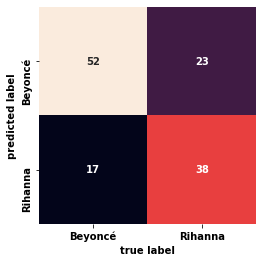

In [17]:
artistas = df['artista'].unique()

mat = confusion_matrix(y_test, y_pred)
fig = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=artistas, yticklabels=artistas)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.savefig(FIGURES+'/matriz_artistas.png')

- Como podemos observar o modelo conseguiu acertar 52 vezes as letras de Beyoncé e errar 23 vezes, classificando como Rihanna.
- Para Rihanna conseguiu acertar 38 letras e errar 17 vezes.

In [18]:
pickle.dump(pipe, open(MODELS+'modelo_nlp.sav', 'wb'))

Exportação da pipeline do modelo.